<a href="https://colab.research.google.com/github/redpony/seaml_intro_nns/blob/master/xor_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Point of this notebook

* See the limits of linear models for solving XOR
* See the difficulty of computing derivatives by hand
* See that MLPs with ReLU activations can solve XOR
* See the difficulties with experimenting with MLPs written from scratch by changing the ReLU activation function to a tanh activation function
* See that MLPs can solve XOR with different nonlinear activation functions

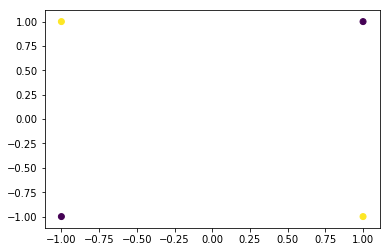

In [4]:
X = np.array([[-1., -1.],
              [-1., 1.],
              [1., -1.],
              [1., 1.]])
y = np.array([[-1.],
              [1.],
              [1.],
              [-1.]])

plt.scatter(X[:,0], X[:,1], c=np.where(np.reshape(y, (4, )) < 0, 0, 1))

# SGD Configuration

In [0]:
ETA = 0.15  # learning rate for SGD
EPOCHS = 35

# Linear model

Predictions after training:
[[ 1.61281734e-14]
 [ 3.27125935e-14]
 [-3.27125935e-14]
 [-1.61281734e-14]]


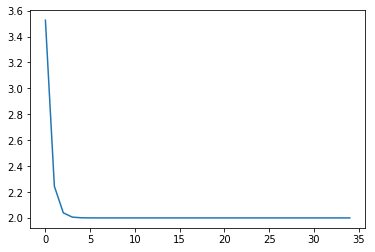

In [6]:
W = np.random.normal(size=(2, 1)) / np.sqrt(2)

lin_losses = []

for _ in range(EPOCHS):
    y_pred = X @ W
    loss = 0.5 * np.sum((y_pred - y)**2)
    lin_losses.append(loss)
    
    # loss = 0.5 * \sum_i (yp_i - y_i)^2
    #      = \sum_i yp_i^2 - 2 * yp_i * y_i + y_i^2
    # dloss/dyp_i = 0.5 * (2 * yp_i - 2 * y_i) = yp_i - y_i
    dloss_dy_pred = y_pred - y
    
    # dloss/dW = dy_pred/dW * dloss_dy_pred
    #          = X^T * dloss_dy_pred
    dloss_dW = X.T @ dloss_dy_pred
    
    W -= ETA * dloss_dW

print("Predictions after training:\n{}".format(y_pred))
plt.plot(lin_losses)

# 1 Layer MLP with a ReLU

Predictions after training:
[[-1.        ]
 [ 0.99999999]
 [ 1.        ]
 [-1.        ]]


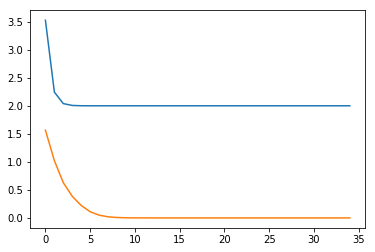

In [7]:
HIDDEN = 32

W = np.random.normal(size=(2, HIDDEN)) / np.sqrt(HIDDEN)
a = np.zeros(shape=(HIDDEN, ))
V = np.random.normal(size=(HIDDEN, 1)) / np.sqrt(HIDDEN)

mlp_losses = []

def relu(x):
    return np.where(x > 0.0, x, 0.0)

for _ in range(EPOCHS):
    p = X @ W + a
    h = relu(p)
    y_pred = h @ V
    loss = 0.5 * np.sum((y_pred - y)**2)
    mlp_losses.append(loss)

    # loss = 0.5 * \sum_i (yp_i - y_i)^2
    #      = \sum_i yp_i^2 - 2 * yp_i * y_i + y_i^2
    # dloss/dyp_i = 0.5 * (2 * yp_i - 2 * y_i) = yp_i - y_i
    dloss_dy_pred = y_pred - y
    
    # dloss/dV = dy_pred/dV * dloss/dy_pred
    #          = h^T * dloss/dy_pred
    dloss_dV = h.T @ dloss_dy_pred
    
    # dloss/dh = dloss/dy_pred * dy_pred/dh
    dloss_dh = dloss_dy_pred @ V.T
    
    # dloss/dp = dloss/dh * dh/dp
    #          = dloss/dh * is_non_zero(dh)
    dloss_dp = np.where(h > 0.0, dloss_dh, 0.0)

    # dloss/da = dloss/dp * dp/da
    #          =          * ones(len(p))
    #          = sum(dloss/dp, axis=0)
    dloss_da = np.sum(dloss_dp, axis=0)
    
    # dloss/dW = dp/dW * dloss/dp
    #            X^T * dloss/dp
    dloss_dW = X.T @ dloss_dp

    a -= ETA * dloss_da
    V -= ETA * dloss_dV
    W -= ETA * dloss_dW

print("Predictions after training:\n{}".format(y_pred))
plt.plot(lin_losses)
plt.plot(mlp_losses)

# MLP Exercise

Let's change the ReLU to `tanh`.

Predictions after training:
[[-0.99999999]
 [ 0.99999998]
 [ 1.        ]
 [-0.99999999]]


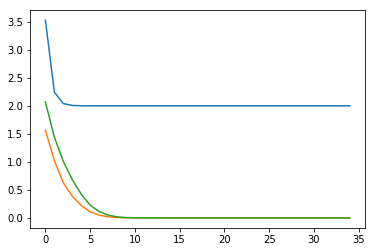

In [8]:
W = np.random.normal(size=(2, HIDDEN)) / np.sqrt(HIDDEN)
a = np.zeros(shape=(HIDDEN, ))
V = np.random.normal(size=(HIDDEN, 1)) / np.sqrt(HIDDEN)

mlp_losses2 = []

def relu(x):
    return np.where(x > 0.0, x, 0.0)

for _ in range(EPOCHS):
    p = X @ W + a
    h = relu(p)  # <--- CHANGE THIS
    y_pred = h @ V
    loss = 0.5 * np.sum((y_pred - y)**2)
    mlp_losses2.append(loss)

    # loss = 0.5 * \sum_i (yp_i - y_i)^2
    #      = \sum_i yp_i^2 - 2 * yp_i * y_i + y_i^2
    # dloss/dyp_i = 0.5 * (2 * yp_i - 2 * y_i) = yp_i - y_i
    dloss_dy_pred = y_pred - y
    
    # dloss/dV = dy_pred/dV * dloss/dy_pred
    #          = h^T * dloss/dy_pred
    dloss_dV = h.T @ dloss_dy_pred
    
    # dloss/dh = dloss/dy_pred * dy_pred/dh
    dloss_dh = dloss_dy_pred @ V.T
    
    # dloss/dp = dloss/dh * dh/dp
    #          = dloss/dh * is_non_zero(dh)
    dloss_dp = np.where(h > 0.0, dloss_dh, 0.0)

    # dloss/da = dloss/dp * dp/da
    #          =          * ones(len(p))
    #          = sum(dloss/dp, axis=0)
    dloss_da = np.sum(dloss_dp, axis=0)
    
    # dloss/dW = dp/dW * dloss/dp
    #            X^T * dloss/dp
    dloss_dW = X.T @ dloss_dp

    a -= ETA * dloss_da
    V -= ETA * dloss_dV
    W -= ETA * dloss_dW

print("Predictions after training:\n{}".format(y_pred))
plt.plot(lin_losses)
plt.plot(mlp_losses)
plt.plot(mlp_losses2)